# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet('/Users/vjaksani/Desktop/Python/DataVisualisationAssignment/Assignment/Data/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload



In [12]:
#from google.colab import drive
#drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [78]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/vjaksani/Desktop/Python/DataVisualisationAssignment/Assignment/Data/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
sampled_data=[]


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file

        df1 = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        df1['dateTime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
        for date1 in df1['dateTime'].dt.date.unique():
            for hour in range(24):
                hourly_data = df1[(df1['dateTime'].dt.date == date1) & (df1['dateTime'].dt.hour == hour)]
                sampled_hourly_data = hourly_data.sample(frac=0.05, random_state=42)  # Set random_state for reproducibility
                sampled_data.append(sampled_hourly_data)
        

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df =  pd.concat(sampled_data, ignore_index=True)
        df.head()
        df.info()
        # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33330 entries, 0 to 33329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               33330 non-null  int32         
 1   tpep_pickup_datetime   33330 non-null  datetime64[us]
 2   tpep_dropoff_datetime  33330 non-null  datetime64[us]
 3   passenger_count        31535 non-null  float64       
 4   trip_distance          33330 non-null  float64       
 5   RatecodeID             31535 non-null  float64       
 6   store_and_fwd_flag     31535 non-null  object        
 7   PULocationID           33330 non-null  int32         
 8   DOLocationID           33330 non-null  int32         
 9   payment_type           33330 non-null  int64         
 10  fare_amount            33330 non-null  float64       
 11  extra                  33330 non-null  float64       
 12  mta_tax                33330 non-null  float64       
 13  t

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [79]:
# Store the df in csv/parquet
#df.to_parquet('/Users/vjaksani/Desktop/Python/DataVisualisationAssignment/Assignment/Data/sampled_data.csv')
df.to_parquet('/Users/vjaksani/Desktop/Python/DataVisualisationAssignment/Assignment/Data/finalData.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [5]:
# Load the new data file
df = pd.read_parquet('/Users/vjaksani/Desktop/Python/DataVisualisationAssignment/Assignment/Data/finalData.parquet') 
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN               None           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN               None           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        5.66           0.0   
1             0  ...    0.0      0.5        3.00           0.0   
2             1  ...    1.0      0.5        3.14           0.0   
3             0  ...    0.0      0.5        0.00           0.0   
4             1  ...    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

             dateTime airport_fee  
0 2023-12-01 00:27:51         NaN  
1 2023-12-01 00:38:48         NaN  
2 2023-12-01 00:06:19         NaN  
3 2023-12-01 00:00:50         NaN  
4 2023-12-01 00:16:07         NaN  

[5 rows x 21 columns]

In [6]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN               None           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN               None           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        5.66           0.0   
1             0  ...    0.0      0.5        3.00           0.0   
2             1  ...    1.0      0.5        3.14           0.0   
3             0  ...    0.0      0.5        0.00           0.0   
4             1  ...    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

             dateTime airport_fee  
0 2023-12-01 00:27:51         NaN  
1 2023-12-01 00:38:48         NaN  
2 2023-12-01 00:06:19         NaN  
3 2023-12-01 00:00:50         NaN  
4 2023-12-01 00:16:07         NaN  

[5 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [8]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
#df.drop(columns=[''])

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [9]:
# Combine the two airport fee columns
#df_backup = df
#df['Airport_fee'] = df['Airport_fee'] + df['airport_fee']
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])



In [10]:
df['Airport_fee'].isna().sum()

np.int64(12942)

In [11]:
df.drop('airport_fee', axis=1, inplace=True)


In [12]:

df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'dateTime'],
      dtype='object')

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [13]:
# check where values of fare amount are negative

np.where(df[df.fare_amount < 0])

df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'dateTime'],
      dtype='object')

In [14]:

np.where(df[df.fare_amount < 0])

(array([], dtype=int64), array([], dtype=int64))

Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts
df[df.total_amount < 0].RatecodeID

9940      2.0
31436     1.0
41404     1.0
69732     1.0
87570     1.0
100089    2.0
132714    2.0
136446    1.0
139879    1.0
155721    2.0
199009    2.0
280505    1.0
316788    1.0
373420    2.0
379145    2.0
Name: RatecodeID, dtype: float64

In [16]:
# Find which columns have negative values
number_columns=df.select_dtypes(include=['number']).columns
columns_with_negatives = df[number_columns].columns[(df[number_columns] < 0).any()]
columns_with_negatives


Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [17]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN               None           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN               None           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1        23.30    1.0      0.5        5.66           0.0   
1             0        22.43    0.0      0.5        3.00           0.0   
2             1        10.70    1.0      0.5        3.14           0.0   
3             0        17.22    0.0      0.5        0.00           0.0   
4             1         5.10    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

             dateTime  
0 2023-12-01 00:27:51  
1 2023-12-01 00:38:48  
2 2023-12-01 00:06:19  
3 2023-12-01 00:00:50  
4 2023-12-01 00:16:07

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

In [19]:
# fix mta tax with median value
df.loc[df['mta_tax'] < 0, 'mta_tax'] = df.mta_tax.median()
#0.5


In [20]:
# replacing extra with median value of extra column
df.loc[df['extra'] < 0, 'extra'] = df.extra.median()



In [21]:
# fix improvement_surcharge with median value

df.loc[df['improvement_surcharge'] < 0, 'improvement_surcharge'] = df.improvement_surcharge.median()


In [22]:
# fix congestion_surcharge with median value

df.loc[df['congestion_surcharge'] < 0, 'congestion_surcharge'] = df.congestion_surcharge.median()

In [23]:
# replace total amount with 0 where trip distance is 0 for negative total amount values
df.loc[(df['total_amount'] <0) & (df['trip_distance'] == 0),'total_amount'] = np.float64(0.0)


In [24]:
# fix total amount negative values with average value per mile * total distance
dfTemp = df[(df.total_amount > 0) & (df.trip_distance > 0)]

In [25]:
meanValue = ((dfTemp['total_amount'] + dfTemp['mta_tax']  + dfTemp['improvement_surcharge'] + dfTemp['extra'] + dfTemp['tip_amount'])/ dfTemp['trip_distance']).mean()
df.loc[df['total_amount'] < 0, 'total_amount'] = (meanValue * df['trip_distance'])
#meanValue

In [26]:
#check for negative values again
number_columns=df.select_dtypes(include=['number']).columns
columns_with_negatives = df[number_columns].columns[(df[number_columns] < 0).any()]
columns_with_negatives

Index(['Airport_fee'], dtype='object')

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [27]:
# Find the proportion of missing values in each column
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12942
trip_distance                0
RatecodeID               12942
store_and_fwd_flag       12942
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     12942
Airport_fee              12942
dateTime                     0
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [28]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
mean_passengers = np.floor(df.passenger_count.mean())
df['passenger_count'] = df['passenger_count'].fillna(mean_passengers)

In [29]:
df.passenger_count.value_counts()

passenger_count
1.0    289049
2.0     55136
3.0     13712
4.0      7613
0.0      5824
5.0      4744
6.0      3185
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

In [30]:
df.loc[df['passenger_count'] == 0, 'passenger_count'] = mean_passengers


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [31]:
# Fix missing values in 'RatecodeID'
# fixing with ratecodeid mode value
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [32]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0])



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [33]:
# Handle any remaining missing values
import geopandas as gpd

#df.isnull().sum()
zones = gpd.read_file('/Users/vjaksani/Desktop/Python/DataVisualisationAssignment/Assignment/Data/taxi_zones/taxi_zones.shp')
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [34]:
#df['Airport_fee'] = df['Airport_fee'].fillna(df['Airport_fee'].median())
cities_list = zones[zones.zone.str.contains('Airport')].LocationID
cities_list.head()

0        1
131    132
137    138
Name: LocationID, dtype: int32

In [35]:
#zones[zones.zone.str.contains('Airport')]
df[df['Airport_fee']>0].Airport_fee.median()

np.float64(1.75)

In [36]:
#check if airport fee column is nan and for corresponding row location id is in above filtered zones

df.loc[(df['Airport_fee'].isnull()) & (df['DOLocationID'].isin(cities_list)), 'Airport_fee'] = df[df['Airport_fee']>0].Airport_fee.median()


In [37]:
df['Airport_fee'] = df['Airport_fee'].fillna(0)

In [41]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dateTime                 0
dtype: int64

In [39]:
#fix store and fwd flag by imputing with N as majority of the values are N
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [42]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()



VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379268.000000  379268.000000  379268.000000  379268.000000   
mean          1.370013       3.611285       1.622644     165.262672   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.862805      49.391070       7.333470      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582698   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495393       3.540784       0.589633               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048212       4.024369       2.175130               0.028366   

        total_amount  congestion_surcharge    Airport_fee  \
count  379268.000000         379268.000000  379268.000000   
mean       29.224090              2.315460       0.141291   
min         0.000000              0.000000      -1.750000   
25%        15.960000              2.500000       0.000000   
50%        21.000000              2.500000       0.000000   
75%        30.750000              2.500000       0.000000   
max    143167.450000              2.500000       1.750000   
std       233.533213              0.653678       0.462789   

                         dateTime  
count                      379268  
mean   2023-07-02 20:10:08.512407  
min           2023-01-01 00:04:34  
25%    2023-04-02 16:26:38.750000  
50%    2023-06-27 16:07:21.500000  
75%           2023-10-06 19:39:01  
max           2023-12-31 23:54:03  
std                           NaN

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [43]:
# remove passenger_count > 6

df = df[df.passenger_count <= 6]

In [44]:
# Continue with outlier handling
# work on trip distance and amount where trip distance is almost 0 and amount is > 300, remove those rows.
df = df[~((df['trip_distance'].abs() < 0.01) & (df['fare_amount'] > 300))]


In [45]:
# - Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
# removing above filtered values for accurate analysis.

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [46]:
# Entries where `trip_distance` is more than 250  miles. remove the rows as this can deviate our analysis
df = df[~(df['trip_distance'] > 250)]

In [47]:
# Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary) , remove those rows
# filter rows with trip_distance 0 and payment type as 0 and fix payment type with 3 which is no charge
#df[(df['payment_type'] == 0) & (df['trip_distance'] == 0)].head()

df.loc[((df['payment_type'] ==0) & (df['trip_distance'] == 0)),'payment_type'] = 3


In [48]:
#filter rows with payment_type 0 and PULocation != DOLocation and fare_amount > 0 , fix payment type with 5 which is Unknown because it's a valid trip but payment type is not known
df.loc[((df['payment_type'] == 0) & (df['PULocationID'] != df['DOLocationID']) & (df.fare_amount > 0)),'payment_type'] = 5

In [49]:
# remaining are rows where pick up and drop off locations are same, so we can update payment type with voided trip which is 6
df.loc[(df['payment_type'] ==0), 'payment_type']=6

In [50]:
#remove one row where trip distance is 0.7 but fare amount is 143163.45
df = df[~(df.fare_amount==143163.45)]

In [51]:
# Do any columns need standardising?
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379240.000000                      379240                      379240   
mean        1.734195  2023-07-02 20:10:51.101481  2023-07-02 20:28:11.078137   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:09:02.500000         2023-06-27 16:25:26   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447396                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379240.000000  379240.000000  379240.000000  379240.000000   
mean          1.369929       3.434105       1.622250     165.261818   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           6.000000     187.350000      99.000000     265.000000   
std           0.862475       4.524067       7.332001      64.019241   

        DOLocationID   payment_type    fare_amount          extra  \
count  379240.000000  379240.000000  379240.000000  379240.000000   
mean      163.987335       1.318988      19.788872       1.582779   
min         1.000000       1.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       6.000000     519.600000      14.250000   
std        69.769918       0.778435      18.042478       1.821085   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379240.000000  379240.000000  379240.000000          379240.000000   
mean        0.495414       3.540755       0.589535               0.999067   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048106       4.022888       2.174736               0.028181   

        total_amount  congestion_surcharge    Airport_fee  \
count  379240.000000         379240.000000  379240.000000   
mean       28.837696              2.315559       0.141288   
min         0.000000              0.000000      -1.750000   
25%        15.960000              2.500000       0.000000   
50%        21.000000              2.500000       0.000000   
75%        30.750000              2.500000       0.000000   
max       535.750000              2.500000       1.750000   
std        22.613331              0.653518       0.462783   

                         dateTime  
count                      379240  
mean   2023-07-02 20:10:51.101481  
min           2023-01-01 00:04:34  
25%    2023-04-02 16:26:38.750000  
50%    2023-06-27 16:09:02.500000  
75%           2023-10-06 19:39:01  
max           2023-12-31 23:54:03  
std                           NaN

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [52]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'dateTime']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [53]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


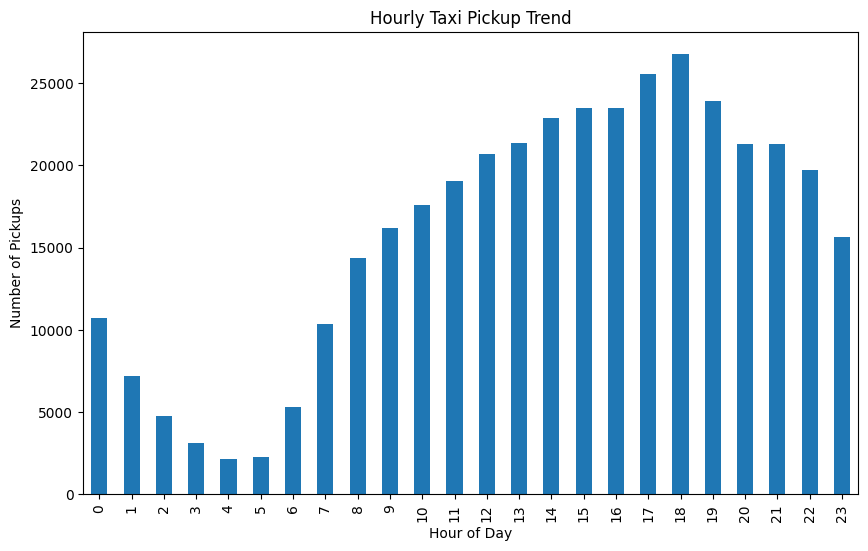

In [54]:
hourly_pickups = df.groupby('pickup_hour').size()

plt.figure(figsize=(10, 6))
hourly_pickups.plot(kind='bar')
plt.title('Hourly Taxi Pickup Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

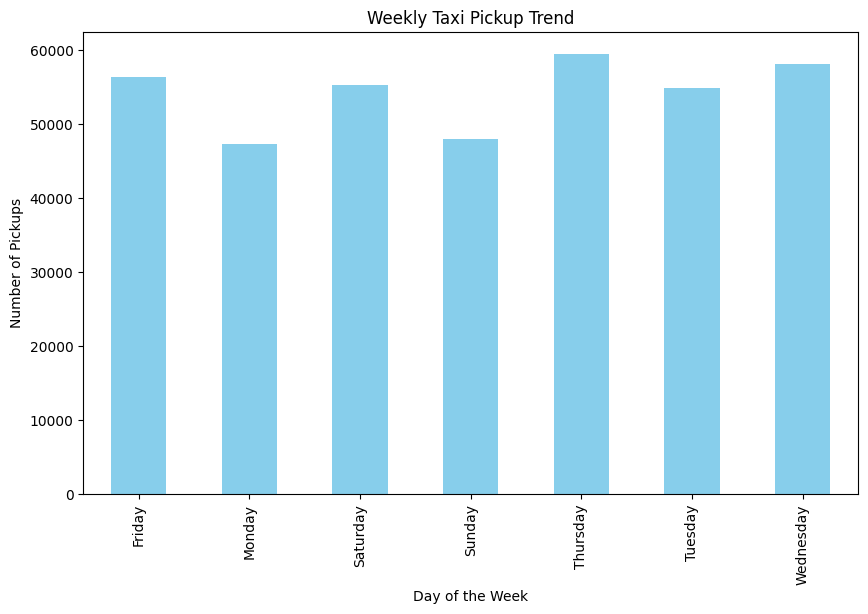

In [55]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name'] = df['pickup_day_of_week'].map(day_map)
pickups_daily = df.groupby('pickup_day_name').size()
plt.figure(figsize=(10, 6))
pickups_daily.plot(kind='bar', color='skyblue')
plt.title('Weekly Taxi Pickup Trend')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()




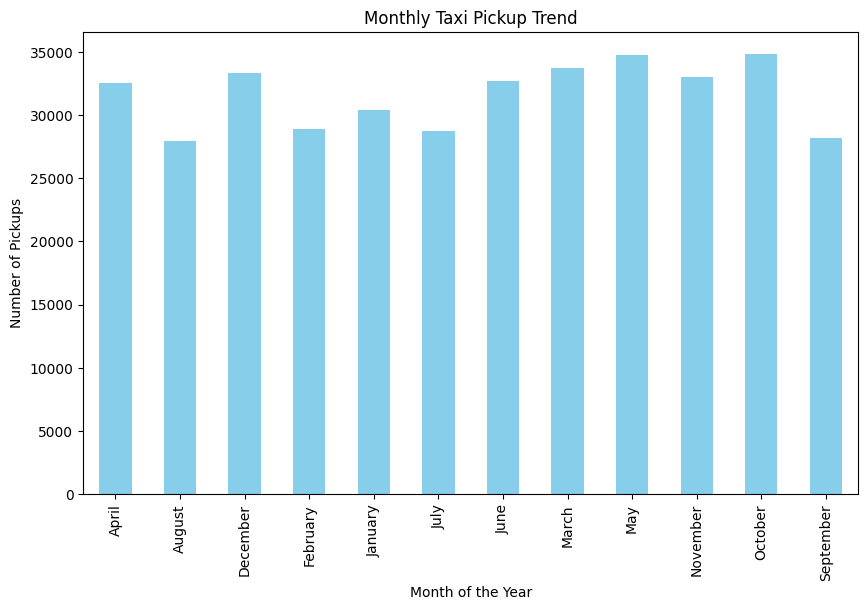

In [56]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['pickup_month_name'] = df['pickup_month'].map(month_map)

pickups_monthly = df.groupby('pickup_month_name').size()
plt.figure(figsize=(10, 6))
pickups_monthly.plot(kind='bar', color='skyblue')
plt.title('Monthly Taxi Pickup Trend')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [57]:
# Analyse the above parameters

df[df.total_amount <= 0].count()

# Yes we have values with `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance` as 0 in the dataset.

VendorID                 51
tpep_pickup_datetime     51
tpep_dropoff_datetime    51
passenger_count          51
trip_distance            51
RatecodeID               51
store_and_fwd_flag       51
PULocationID             51
DOLocationID             51
payment_type             51
fare_amount              51
extra                    51
mta_tax                  51
tip_amount               51
tolls_amount             51
improvement_surcharge    51
total_amount             51
congestion_surcharge     51
Airport_fee              51
dateTime                 51
pickup_hour              51
pickup_day_of_week       51
pickup_day_name          51
pickup_month             51
pickup_month_name        51
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [58]:
# Create a df with non zero entries for the selected parameters.

# firstly we can drop rows where pick up and drop is same with zero fare amount
# next check if we still have any records with fare amount as 0, if yes we can remove those rows as well
# we can still keep tip amount as 0 rows as it is a possible scenario
# next we can drop rows where pick up and drop is same with zero trip distance
# We can remove rows where trip_distance is 0 as it's not useful in our analysis.

df = df[~((df['PULocationID'] == df['DOLocationID']) & (df.fare_amount == 0))]

In [59]:
df = df[~(df.fare_amount <= 0)]

In [60]:
#df[(df.trip_distance <= 0)].head()
df = df[~((df['PULocationID'] == df['DOLocationID']) & (df.trip_distance <= 0))]

In [61]:
df = df[~(df.trip_distance <= 0)]

In [62]:
df.shape

(371713, 25)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: title={'center': 'Monthly Revenue Analysis'}, xlabel='Month', ylabel='Total Revenue'>

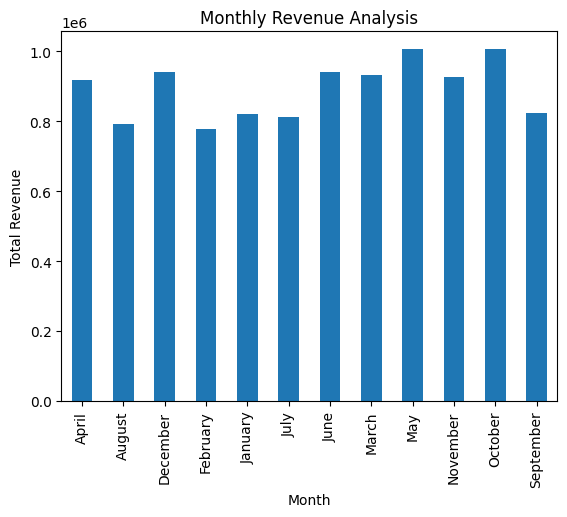

In [63]:
# Group data by month and analyse monthly revenue


# Group by month and calculate the total revenue for each month
monthly_revenue = df.groupby('pickup_month_name')['total_amount'].sum()

# Plotting the monthly revenue
monthly_revenue.plot.bar(title='Monthly Revenue Analysis',xlabel='Month',ylabel='Total Revenue' )


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<Axes: title={'center': 'Monthly Revenue Analysis'}, xlabel='Month', ylabel='Total Revenue'>

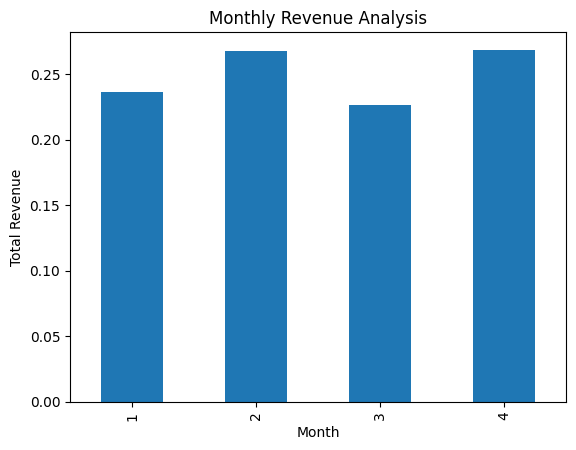

In [64]:
# Calculate proportion of each quarter

df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
total_revenue = quarterly_revenue.sum()
quarterly_proportion = quarterly_revenue / total_revenue
quarterly_proportion.plot.bar(title='Monthly Revenue Analysis',xlabel='Month',ylabel='Total Revenue' )



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

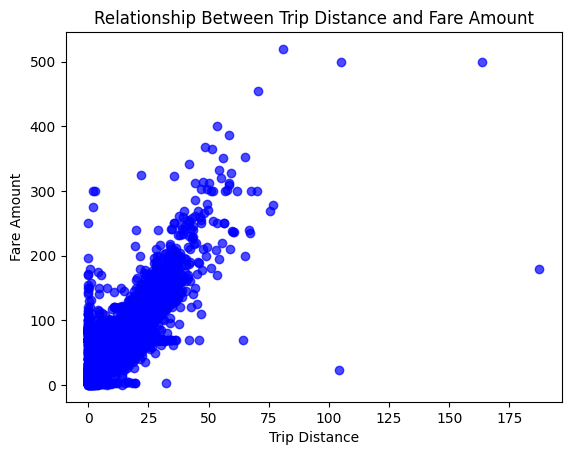

0.9435532510348903


In [65]:
# Show how trip fare is affected by distance
#df[df.trip_distance == 0].count() # no rows with trip_distance is 0, we have removed them as part of data cleaning

plt.scatter(df['trip_distance'], df['fare_amount'], color='blue', alpha=0.7)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

correlation_value = df['trip_distance'].corr(df['fare_amount'])
print(correlation_value)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

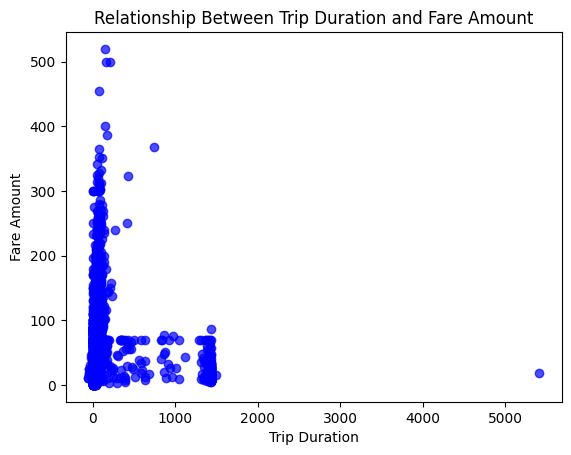

0.2810202185284621


In [66]:
# Show relationship between fare and trip duration

df['total_time'] = ((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60)  # Convert to minutes
plt.scatter(df['total_time'], df['fare_amount'], color='blue', alpha=0.7)
plt.title('Relationship Between Trip Duration and Fare Amount')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()
correlation_value = df['total_time'].corr(df['fare_amount'])
print(correlation_value)


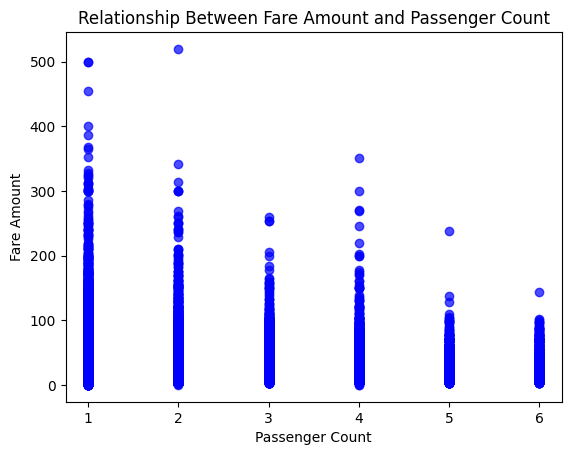

0.039577358992112885


In [67]:
# Show relationship between fare and number of passengers

plt.scatter(df['passenger_count'], df['fare_amount'], color='blue', alpha=0.7)
plt.title('Relationship Between Fare Amount and Passenger Count')
plt.ylabel('Fare Amount')
plt.xlabel('Passenger Count')
plt.show()
correlation_value = df['passenger_count'].corr(df['fare_amount'])
print(correlation_value)


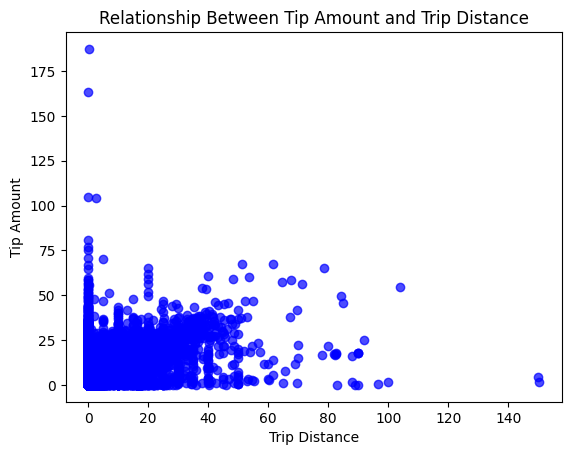

0.5872015833085402


In [68]:
# Show relationship between tip and trip distance

plt.scatter(df['tip_amount'], df['trip_distance'], color='blue', alpha=0.7)
plt.title('Relationship Between Tip Amount and Trip Distance')
plt.ylabel('Tip Amount')
plt.xlabel('Trip Distance')
plt.show()
correlation_value = df['tip_amount'].corr(df['trip_distance'])
print(correlation_value)


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

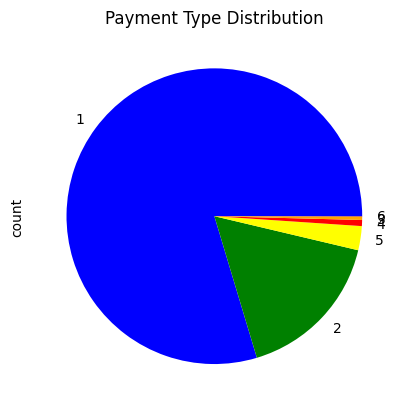

payment_type
1    296046
2     61910
5      9784
4      2447
3      1316
6       210
Name: count, dtype: int64


In [69]:
# Analyse the distribution of different payment types (payment_type).

payment_type_counts = df['payment_type'].value_counts()
payment_type_counts.plot(kind='pie', colors=['blue', 'green', 'yellow','red', 'orange', 'brown'], legend=False)
plt.title('Payment Type Distribution')
plt.show()
print(payment_type_counts)



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [70]:
# import geopandas as gpd


# Read the shapefile using geopandas
# I have already used this file above so zones variable is already populated
#zones = # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

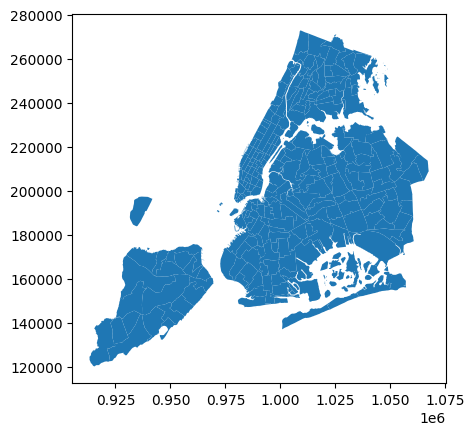

In [71]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [72]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              1.0   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         1.0                  N           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         1.0                  N           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  pickup_month_name  pickup_quarter  total_time  OBJECTID  \
0             1  ...           December               4   22.350000     148.0   
1             5  ...           December               4   23.116667     231.0   
2             1  ...           December               4   10.633333     161.0   
3             5  ...           December               4   13.783333     137.0   
4             1  ...           December               4    3.166667      68.0   

   Shape_Leng  Shape_Area                  zone  LocationID    borough  \
0    0.039131    0.000070       Lower East Side       148.0  Manhattan   
1    0.063420    0.000167  TriBeCa/Civic Center       231.0  Manhattan   
2    0.035804    0.000072        Midtown Center       161.0  Manhattan   
3    0.046108    0.000116              Kips Bay       137.0  Manhattan   
4    0.049337    0.000111          East Chelsea        68.0  Manhattan   

                                            geometry  
0  POLYGON ((988552.836 201677.665, 988387.669 20...  
1  POLYGON ((981667.364 203305, 981854.109 203130...  
2  POLYGON ((991081.026 214453.698, 990952.644 21...  
3  POLYGON ((991954.728 209026.462, 991949.076 20...  
4  POLYGON ((983690.405 209040.369, 983550.612 20...  

[5 rows x 34 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [73]:
# Group data by location and calculate the number of trips
trips_per_location=merged_df.groupby('PULocationID').size().reset_index(name='num_trips')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [74]:
# Merge trip counts back to the zones GeoDataFrame

zones_merged = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')



In [75]:
zones_merged.columns


Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'PULocationID', 'num_trips'],
      dtype='object')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

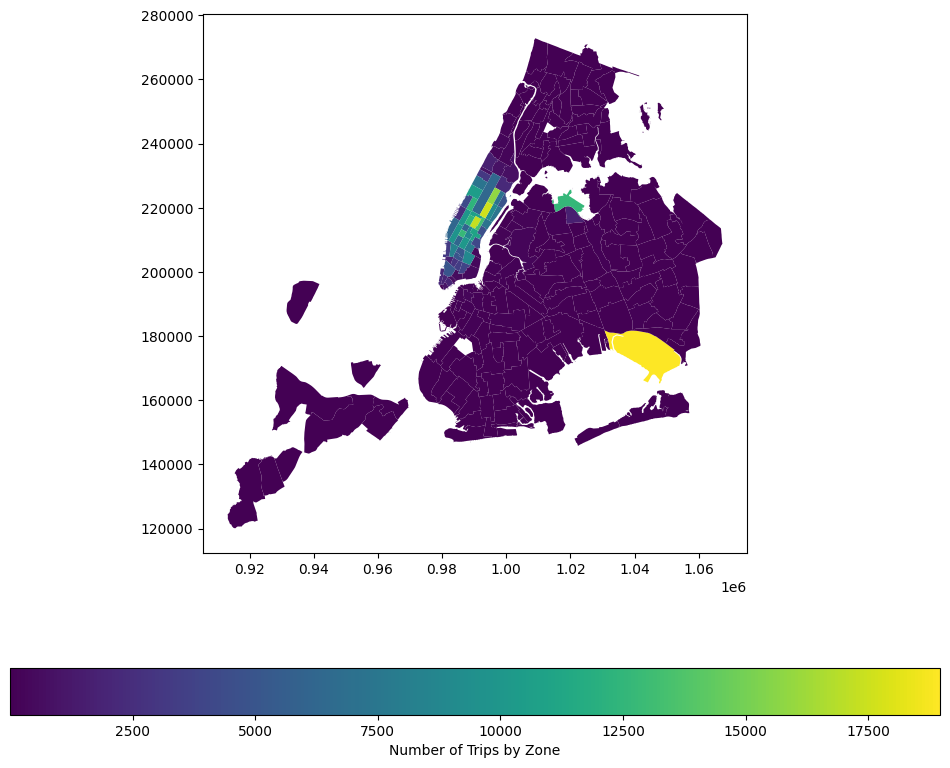

In [76]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

zones_merged.plot(column='num_trips', legend=True,ax = ax,
                legend_kwds={'label': "Number of Trips by Zone",
                             'orientation': "horizontal"})



In [77]:
# can you try displaying the zones DF sorted by the number of trips?

zones_merged.sort_values(by='num_trips', ascending=False)


OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
131       132    0.245479    0.002038                JFK Airport         132   
236       237    0.042213    0.000096      Upper East Side South         237   
160       161    0.035804    0.000072             Midtown Center         161   
235       236    0.044252    0.000103      Upper East Side North         236   
161       162    0.035270    0.000048               Midtown East         162   
..        ...         ...         ...                        ...         ...   
186       187    0.126868    0.000421              Port Richmond         187   
198       199    0.077809    0.000289              Rikers Island         199   
205       206    0.212757    0.000944  Saint George/New Brighton         206   
220       221    0.166218    0.000890                  Stapleton         221   
250       251    0.137711    0.000626                Westerleigh         251   

           borough                                           geometry  \
131         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..             ...                                                ...   
186  Staten Island  MULTIPOLYGON (((946964.115 173161.64, 946977.8...   
198          Bronx  POLYGON ((1015023.713 230286.759, 1015093.307 ...   
205  Staten Island  POLYGON ((961436.305 175473.03, 961460.942 175...   
220  Staten Island  POLYGON ((963349.728 171627.581, 963397.759 17...   
250  Staten Island  POLYGON ((947868.004 169247.734, 948000.981 16...   

     PULocationID  num_trips  
131         132.0    18963.0  
236         237.0    17563.0  
160         161.0    17290.0  
235         236.0    15808.0  
161         162.0    13317.0  
..            ...        ...  
186           NaN        NaN  
198           NaN        NaN  
205           NaN        NaN  
220           NaN        NaN  
250           NaN        NaN  

[263 rows x 9 columns]

In [78]:
# Busiest hours is 18:00, Busiest day is Thursday, Busiest Month is October & May.
# Most revenue is generated in months of October and May, Quarter 2 and 4 performed well in terms of total revenue.
# fare amount is highly positively correlated with trip distance, trip_duration and fare amount is slightly positively correlated, fare amount with passenger count has no major correlation
# tip amount is 0.58 times correlated with trip distance which is a positive correlation.
# Busiest zones are JFK Airport followed by Upper East Side South.



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [79]:
# Find routes which have the slowest speeds at different times of the day
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'dateTime',
       'pickup_hour', 'pickup_day_of_week', 'pickup_day_name', 'pickup_month',
       'pickup_month_name', 'pickup_quarter', 'total_time'],
      dtype='object')

In [80]:
avg_trip_duration = df.groupby(['pickup_hour'])['total_time'].mean().reset_index()
(df['total_time'] / avg_trip_duration['total_time'].mean()).sort_values()

134652     -3.143413
134640     -3.050054
134679     -2.876247
134705     -2.765011
134674     -2.637884
             ...    
77859      85.751105
60489      85.766003
52318      85.777921
95926      89.375217
18194     322.445609
Name: total_time, Length: 371713, dtype: float64

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

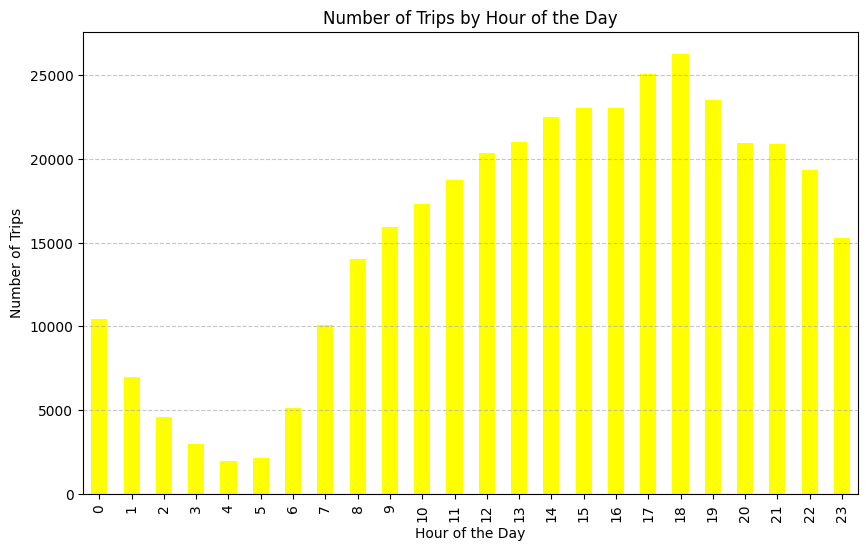

In [81]:
# Visualise the number of trips per hour and find the busiest hour

trips_by_hour = df.groupby('pickup_hour').size()
plt.figure(figsize=(10, 6))
trips_by_hour.plot(kind='bar', color='yellow')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [82]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 100
scaled_trips_by_hour = trips_by_hour * 100
scaled_trips_by_hour.sort_values(ascending=False).head(5)



pickup_hour
18    2627300
17    2506000
19    2351400
16    2306200
15    2306100
dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

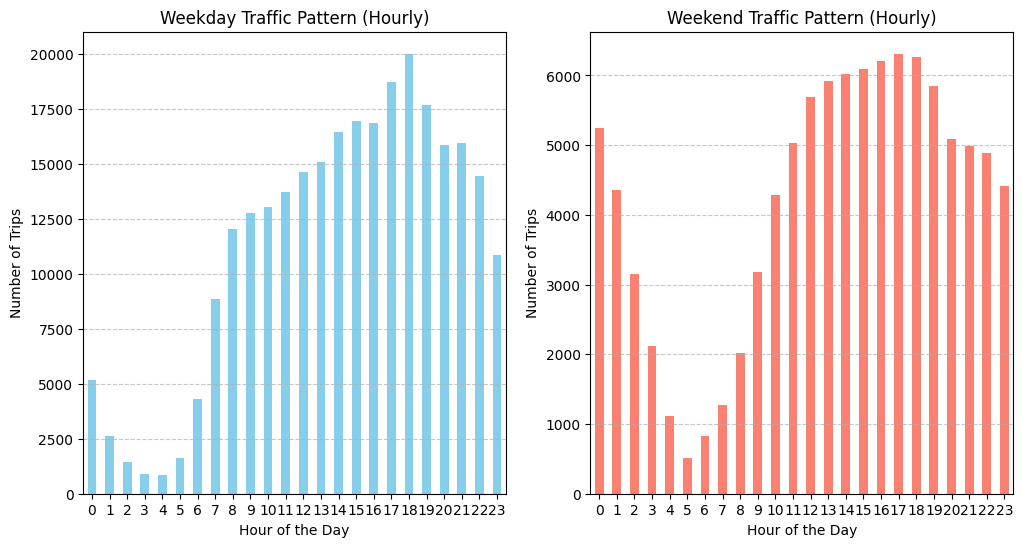

Busiest hour on weekdays is 18:00 with 20014 trips.
Busiest hour on weekends is 17:00 with 6311 trips.


In [83]:
# Compare traffic trends for the week days and weekends

df['day_type'] = df['pickup_day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
weekday_trips = df[df['day_type'] == 'Weekday'].groupby('pickup_hour').size()
weekend_trips = df[df['day_type'] == 'Weekend'].groupby('pickup_hour').size()

# Visualize the hourly traffic patterns for weekdays and weekends
plt.figure(figsize=(12, 6))

# Plot Weekday traffic pattern
plt.subplot(1, 2, 1)
weekday_trips.plot(kind='bar', color='skyblue')
plt.title('Weekday Traffic Pattern (Hourly)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot Weekend traffic pattern
plt.subplot(1, 2, 2)
weekend_trips.plot(kind='bar', color='salmon')
plt.title('Weekend Traffic Pattern (Hourly)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Compare the busiest hour for weekdays and weekends
busiest_weekday_hour = weekday_trips.idxmax()
busiest_weekday_trips = weekday_trips.max()

busiest_weekend_hour = weekend_trips.idxmax()
busiest_weekend_trips = weekend_trips.max()

print(f"Busiest hour on weekdays is {busiest_weekday_hour}:00 with {busiest_weekday_trips} trips.")
print(f"Busiest hour on weekends is {busiest_weekend_hour}:00 with {busiest_weekend_trips} trips.")


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [84]:
# Find top 10 pickup and dropoff zones
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

pickup_zones=df.groupby(['pickup_hour','PULocationID']).size().reset_index(name = 'zone_pickup_count')
dropOff_zones=df.groupby(['dropoff_hour','DOLocationID']).size().reset_index(name = 'zone_dropoff_count')
pickup_zones_count = pickup_zones.groupby('PULocationID')['zone_pickup_count'].sum().nlargest(10)
dropoff_zones_count = dropOff_zones.groupby('DOLocationID')['zone_dropoff_count'].sum().nlargest(10)

print(f"top 10 pickup zones: {pickup_zones_count}")
print(f"top 10 dropoff zones: {dropoff_zones_count}")


top 10 pickup zones: PULocationID
132    18963
237    17563
161    17290
236    15808
162    13317
186    12691
138    12649
142    12307
230    12240
170    10981
Name: zone_pickup_count, dtype: int64
top 10 dropoff zones: DOLocationID
236    16604
237    15768
161    14567
230    11297
170    11044
162    10602
142    10545
239    10367
141     9768
68      9488
Name: zone_dropoff_count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [85]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

temp_merged_zones = pd.merge(pickup_zones, dropOff_zones, left_on='PULocationID', right_on='DOLocationID', how='outer')
temp_merged_zones['zones_ratio'] = temp_merged_zones['zone_pickup_count']/temp_merged_zones['zone_dropoff_count']
print(f"top 10 ratio: {temp_merged_zones['zones_ratio'].nlargest(10)}")
print(f"Bottom 10 ratio: {temp_merged_zones['zones_ratio'].nsmallest(10)}")



top 10 ratio: 37016    230.75
37064    217.25
37040    214.50
37088    204.00
37112    199.75
37136    199.75
37232    199.75
36968    193.75
36944    191.75
37184    191.75
Name: zones_ratio, dtype: float64
Bottom 10 ratio: 10549    0.002625
10550    0.002653
10553    0.002653
10554    0.002809
10551    0.002833
10552    0.003021
10555    0.003215
10556    0.003333
10557    0.003344
10548    0.004405
Name: zones_ratio, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [86]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = [23,0,1,2,3,4,5]
night_pickups = df[df.pickup_hour.isin(night_hours)]
night_dropoffs = df[df.dropoff_hour.isin(night_hours)]
night_pickup_zones=night_pickups.groupby(['pickup_hour','PULocationID']).size().reset_index(name = 'night_zone_pickup_count')
night_dropOff_zones=night_dropoffs.groupby(['dropoff_hour','DOLocationID']).size().reset_index(name = 'night_zone_dropoff_count')
night_pickup_zones_count = night_pickup_zones.groupby('PULocationID')['night_zone_pickup_count'].sum().nlargest(10)
night_dropoff_zones_count = night_dropOff_zones.groupby('DOLocationID')['night_zone_dropoff_count'].sum().nlargest(10)
print(f"top 10 pickup zones: {night_pickup_zones_count}")
print(f"top 10 dropoff zones: {night_dropoff_zones_count}")



top 10 pickup zones: PULocationID
79     3182
132    2872
249    2617
48     2089
148    1988
230    1735
114    1730
186    1408
164    1254
138    1242
Name: night_zone_pickup_count, dtype: int64
top 10 dropoff zones: DOLocationID
79     1850
48     1569
170    1389
107    1272
68     1258
141    1190
263    1167
249    1031
236    1029
230    1003
Name: night_zone_dropoff_count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [87]:
# Filter for night hours (11 PM to 5 AM)

daytime_pickups = df[~(df.pickup_hour.isin(night_hours))]
#night_pickups = df[df.pickup_hour.isin(night_hours)]


In [88]:
day_revenue = daytime_pickups.total_amount.sum()
night_revenue = night_pickups.total_amount.sum()
print(f"Daytime revenue: {day_revenue}")
print(f"Nighttime revenue: {night_revenue}")



Daytime revenue: 9388518.69
Nighttime revenue: 1306917.42


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [89]:
# Analyse the fare per mile per passenger for different passenger counts

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
price_per_passenger = df.groupby('passenger_count')['fare_per_mile'].mean()
price_per_passenger = price_per_passenger / price_per_passenger.index
price_per_passenger

passenger_count
1.0    10.668431
2.0     6.391498
3.0     4.255027
4.0     4.746516
5.0     1.570459
6.0     1.289554
dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

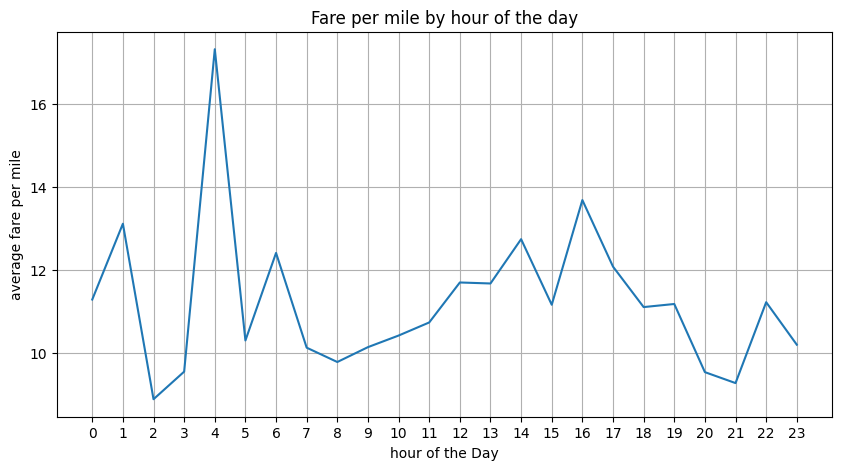

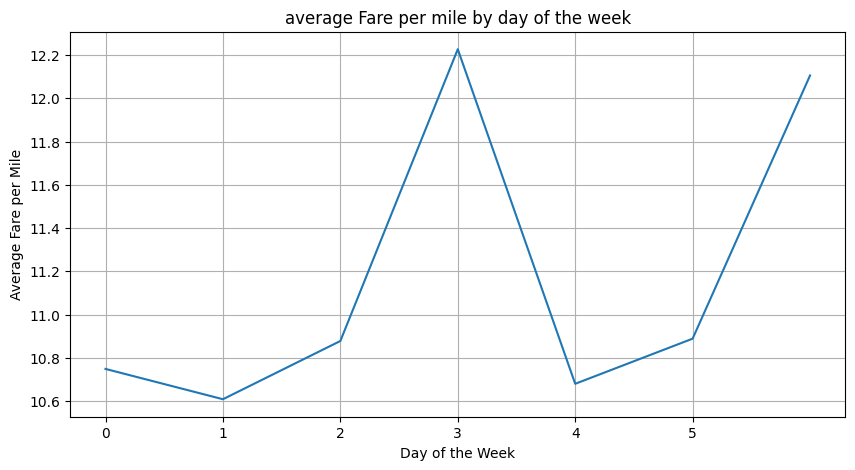

In [90]:
# Compare the average fare per mile for different days and for different times of the day

avg_price_per_day = df.groupby(['pickup_day_of_week'])['fare_per_mile'].mean()
avg_price_per_hour = df.groupby(['pickup_hour'])['fare_per_mile'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_price_per_hour.index, avg_price_per_hour.values)
plt.title('Fare per mile by hour of the day')
plt.xlabel('hour of the Day')
plt.ylabel('average fare per mile')
plt.grid(True)
plt.xticks(range(24)) 
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(avg_price_per_day.index, avg_price_per_day.values)
plt.title('average Fare per mile by day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.grid(True)
plt.xticks(range(6))
plt.show()

In [91]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'dateTime',
       'pickup_hour', 'pickup_day_of_week', 'pickup_day_name', 'pickup_month',
       'pickup_month_name', 'pickup_quarter', 'total_time', 'day_type',
       'dropoff_hour', 'fare_per_mile'],
      dtype='object')

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

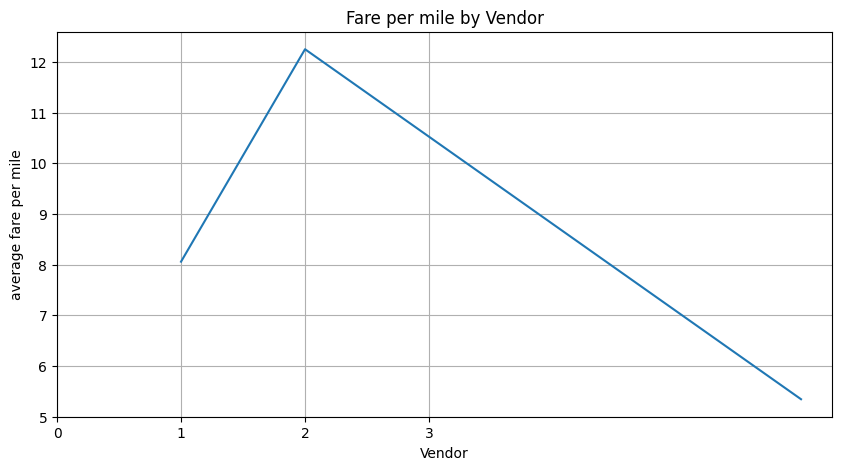

In [92]:
# Compare fare per mile for different vendors
avg_price_per_Vendor = df.groupby(['VendorID'])['fare_per_mile'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_price_per_Vendor.index, avg_price_per_Vendor.values)
plt.title('Fare per mile by Vendor')
plt.xlabel('Vendor')
plt.ylabel('average fare per mile')
plt.grid(True)
plt.xticks(range(4)) 
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [93]:
# Defining distance tiers

tier_ranges = {"up_to_2": (0,2), "2_to_5": (2,5), "5+": (5,float('inf'))}
result_array=[]
for vendor_id in df['VendorID'].unique():
    for range,(min_distance,max_distance) in tier_ranges.items():
        filtered_data = df[(df['VendorID'] == vendor_id) & ((df['trip_distance'] > min_distance) & (df['trip_distance'] <= max_distance))]
        if not filtered_data.empty:
            avg_fare_per_mile = filtered_data['fare_per_mile'].mean()
            result_array.append({'vendorId': vendor_id,'range': range,'average_fare_per_mile': avg_fare_per_mile})
result = pd.DataFrame(result_array)
result


vendorId    range  average_fare_per_mile
0         2  up_to_2              17.824257
1         2   2_to_5               6.535482
2         2       5+               4.485395
3         1  up_to_2               9.788396
4         1   2_to_5               6.380794
5         1       5+               4.417868
6         6  up_to_2              26.912698
7         6   2_to_5               7.577496
8         6       5+               4.139764

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

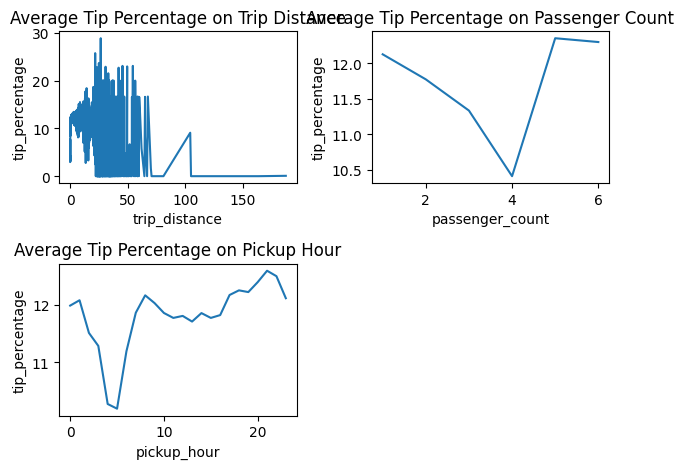

Low Tip Percentage Data Characteristics:
       trip_distance  passenger_count   pickup_hour
count   88253.000000     88253.000000  88253.000000
mean        3.822871         1.419770     13.921000
std         5.098524         0.900598      5.738545
min         0.010000         1.000000      0.000000
25%         1.030000         1.000000     10.000000
50%         1.840000         1.000000     14.000000
75%         3.930000         1.000000     18.000000
max       187.350000         6.000000     23.000000


In [104]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100
avg_tip_on_distance = df.groupby('trip_distance')['tip_percentage'].mean().reset_index()
avg_tip_on_passenger_count = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
avg_tip_on_hour = df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

plt.subplot(2, 2, 1)
sns.lineplot(data=avg_tip_on_distance, x='trip_distance', y='tip_percentage')
plt.title('Average Tip Percentage on Trip Distance')

plt.subplot(2, 2, 2)
sns.lineplot(data=avg_tip_on_passenger_count, x='passenger_count', y='tip_percentage')
plt.title('Average Tip Percentage on Passenger Count')


plt.subplot(2, 2, 3)
sns.lineplot(data=avg_tip_on_hour, x='pickup_hour', y='tip_percentage')
plt.title('Average Tip Percentage on Pickup Hour')

plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

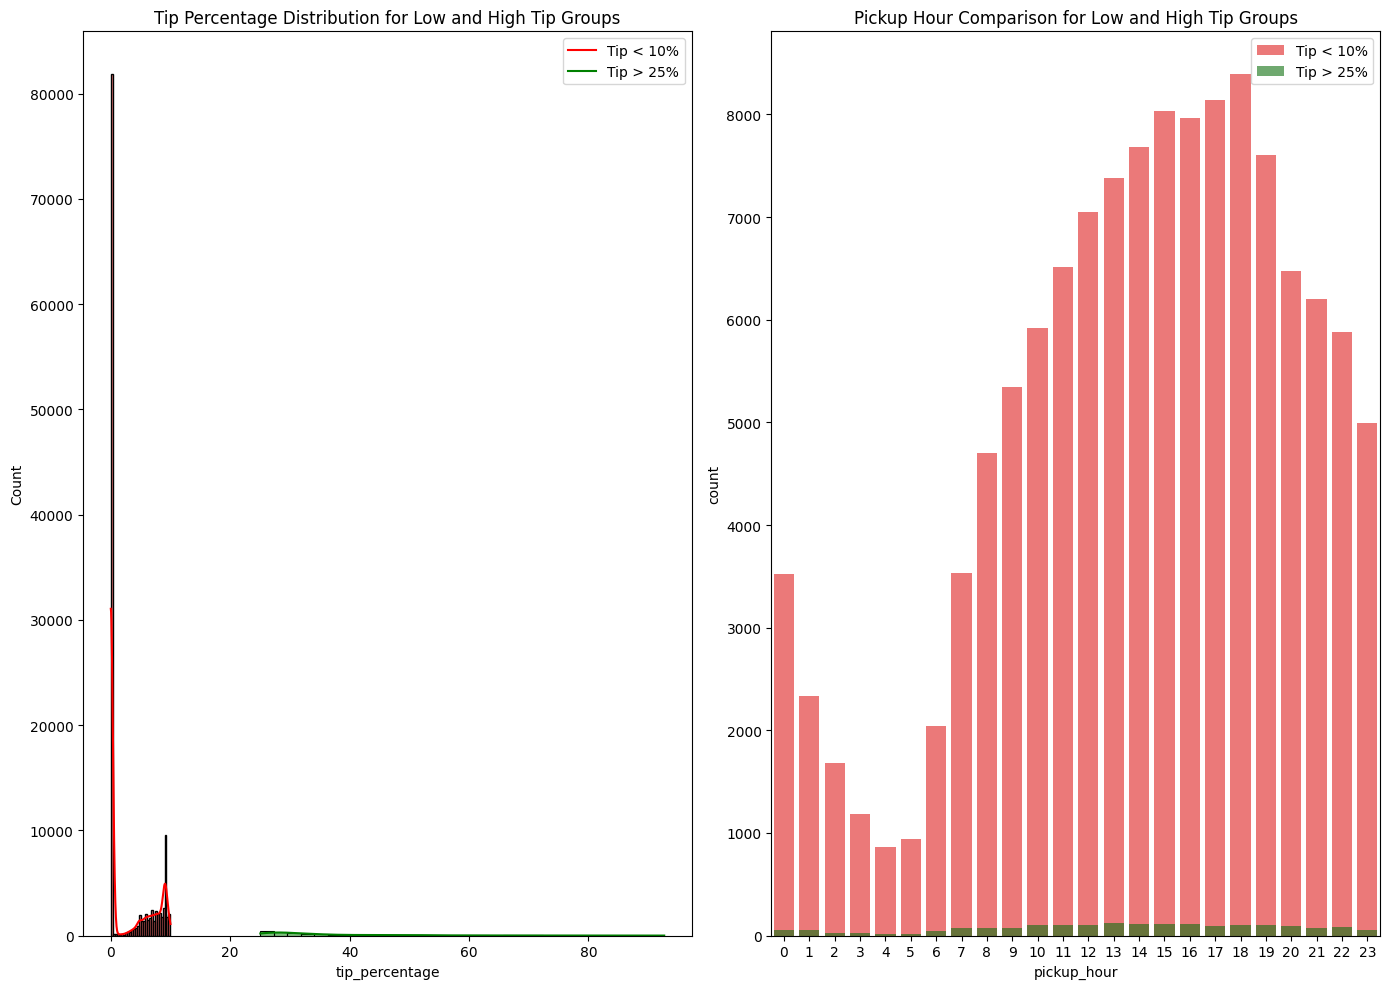

In [108]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip = df[df['tip_percentage'] < 10]
high_tip = df[df['tip_percentage'] > 25]
plt.figure(figsize=(14, 10))

plt.subplot(1, 2, 1)
sns.histplot(low_tip['tip_percentage'], color='red', kde=True, bins=30)
sns.histplot(high_tip['tip_percentage'], color='green', kde=True, bins=30)
plt.title('Tip Percentage Distribution for Low and High Tip Groups')
plt.legend(labels=['Tip < 10%', 'Tip > 25%'])

plt.subplot(1, 2, 2)
sns.countplot(x='pickup_hour', data=low_tip, color='red', alpha=0.6, label='Tip < 10%')
sns.countplot(x='pickup_hour', data=high_tip, color='green', alpha=0.6, label='Tip > 25%')
plt.title('Pickup Hour Comparison for Low and High Tip Groups')
plt.legend()

plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

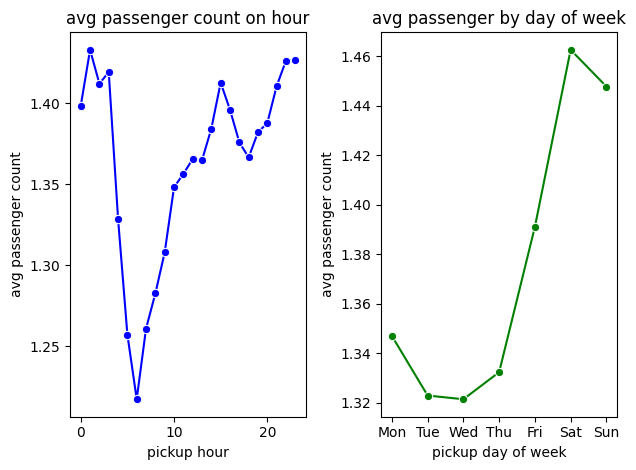

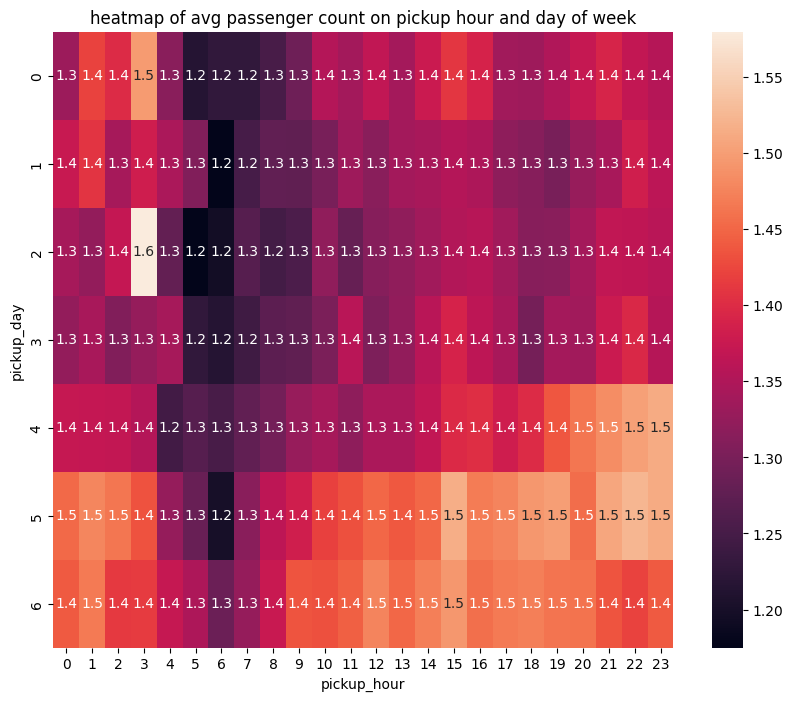

In [113]:
# See how passenger count varies across hours and days
passengers_hourly = df.groupby('pickup_hour')['passenger_count'].mean().reset_index()
passengers_day_of_week = df.groupby('pickup_day_of_week')['passenger_count'].mean().reset_index()
plt.subplot(1, 2, 1)
sns.lineplot(data=passengers_hourly, x='pickup_hour', y='passenger_count', marker='o', color='b')
plt.title('avg passenger count on hour')
plt.xlabel('pickup hour')
plt.ylabel('avg passenger count')

plt.subplot(1, 2, 2)
sns.lineplot(data=passengers_day_of_week, x='pickup_day_of_week', y='passenger_count', marker='o', color='g')
plt.title('avg passenger by day of week')
plt.xlabel('pickup day of week')
plt.ylabel('avg passenger count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

heatmap_data = df.pivot_table(index='pickup_day_of_week', columns='pickup_hour', values='passenger_count', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True)
plt.title('heatmap of avg passenger count on pickup hour and day of week')
plt.xlabel('pickup_hour')
plt.ylabel('pickup_day')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

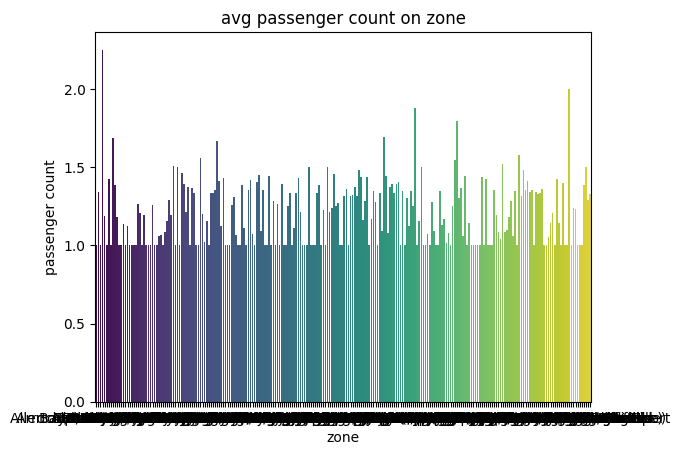

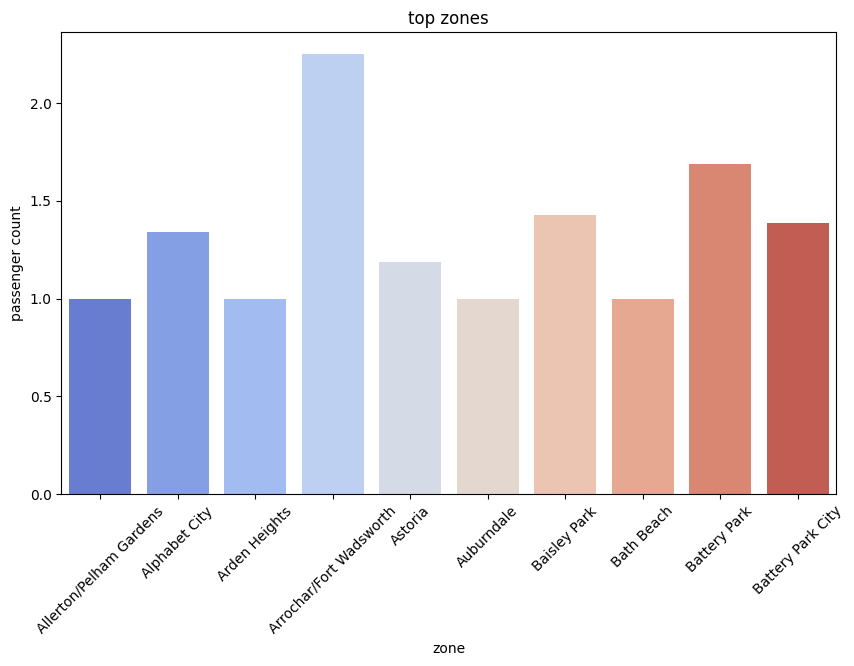

In [118]:
avg_passenger_by_zone = merged_df.groupby(['zone'])['passenger_count'].mean().reset_index()

sns.barplot(data=avg_passenger_by_zone, x='zone', y='passenger_count', palette='viridis')
plt.title('avg passenger count on zone')
plt.xlabel('zone')
plt.ylabel('passenger count')
plt.show()

#to visualise top 10 zones

top_zones = avg_passenger_by_zone.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_zones, x='zone', y='passenger_count', palette='coolwarm')
plt.title(f'top zones')
plt.xlabel('zone')
plt.ylabel('passenger count')
plt.xticks(rotation=45)
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

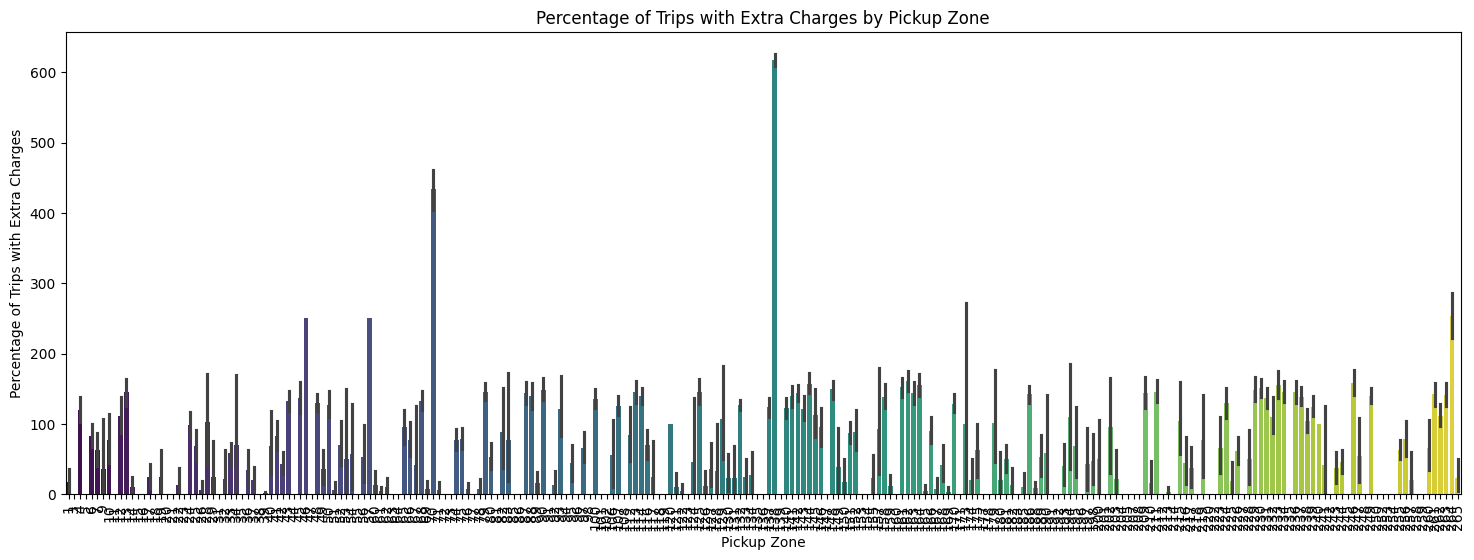

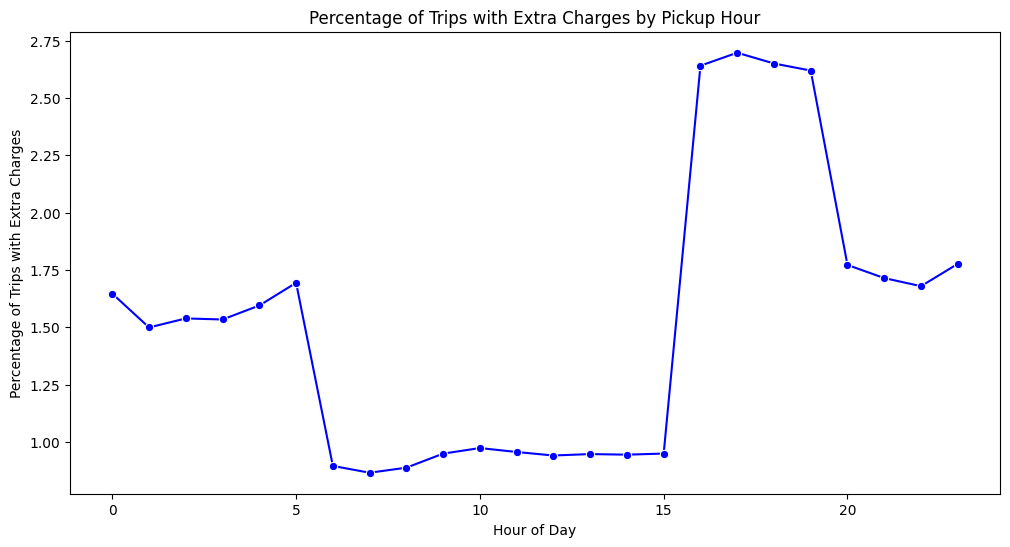

In [127]:
# How often is each surcharge applied?
zones_extra=df.groupby(['PULocationID', 'DOLocationID'])['extra'].mean().reset_index()
zones_extra['extra_freq'] = zones_extra['extra'] * 100  # Convert to percentage

zones_extra = zones_extra.sort_values(by='extra', ascending=False)

plt.figure(figsize=(18, 6))
sns.barplot(data=zones_extra, x='PULocationID', y='extra_freq', palette='viridis')
plt.title('Percentage of Trips with Extra Charges by Pickup Zone')
plt.xlabel('Pickup Zone')
plt.ylabel('Percentage of Trips with Extra Charges')
plt.xticks(rotation=90)
plt.show()

extra_hour = df.groupby('pickup_hour')['extra'].mean().reset_index()
extra_hour['extra_percentage'] = extra_hour['extra'] * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=extra_hour, x='pickup_hour', y='extra', marker='o', color='b')
plt.title('Percentage of Trips with Extra Charges by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Trips with Extra Charges')
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
As we saw that in more demanded pickup hours, extra fee is going up, that extra fee should be applied so that revenue can be maximised in high demand areas, high demand pickup hours, high demand drop off hours and including high demand days and months as well.
Based on analysis:
    18:00 hour of the day have high passenger count per hour and high number of pickups, so surge charge can be increased here to improve the revenue.
    Thursday is the most busiest day, so surge charge can be applied on that day.
    